<a href="https://colab.research.google.com/github/Roozbehn/ciw/blob/master/Wine_Quality_Project_RedWine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries and Setting Up Environment:

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras import layers, models


Mounting Google Drive and Loading Dataset:

In [31]:
# Load the dataset
data = pd.read_csv('/content/winequality-red.csv', sep=';')


Exploring Data:

In [32]:
# Data Introduction
data.columns
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Statistical Summary of the Dataset:

In [33]:
# Data Statistical Information
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Correlation Analysis and Heatmap:

In [37]:
# Data Variance
data.var()


fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
dtype: float64

Correlation Heat Map

In [38]:
# Correlation Heat Map
corr = data.corr()
print(corr)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

Heatmap Visualization of Correlations:

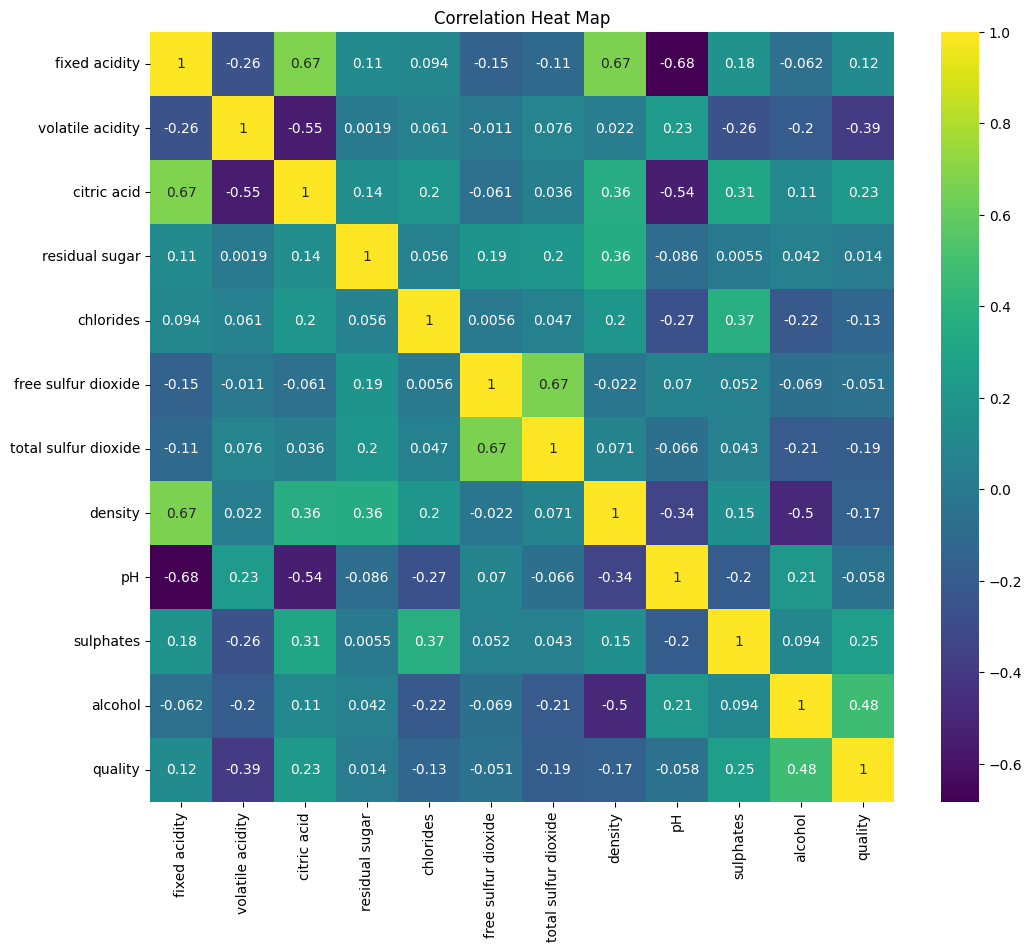

In [39]:
# Correlation Heat Map
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.title("Correlation Heat Map")
plt.show()

Highest Correlation Analysis:

In [40]:
# Identifying the highest correlation pair in the dataset
top_pairs = corr.unstack().sort_values(ascending=False)[12:13]
print(top_pairs)


citric acid  fixed acidity    0.671703
dtype: float64


Most Valubale:

In [41]:

# Most Valuable Quality Analysis
print("\nMost Valuable Quality Analysis:")
print(data['quality'].value_counts())


Most Valuable Quality Analysis:
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


Setting Up for Regression Analysis:

In [42]:
# Separating dependent and independent variables
X = data.iloc[:, :-1].values  # Matrix of independent variables
y = data.iloc[:, -1].values   # Vector of the dependent variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating and training the multiple regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions on the test data
y_pred = regressor.predict(X_test)

# Printing the regression coefficients and the intercept
print("Regression coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

# Evaluating the performance of the model
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R-squared value:", r2_score(y_test, y_pred))


Regression coefficients: [ 4.12835075e-02 -1.14952802e+00 -1.77927063e-01  2.78700036e-02
 -1.87340739e+00  2.68362616e-03 -2.77748370e-03 -3.15166657e+01
 -2.54486051e-01  9.24040106e-01  2.67797417e-01]
Intercept: 34.99871062872121
Mean squared error: 0.3844711978201242
R-squared value: 0.3283887639580225


Naive Bayes Model:

In [53]:
# Separating dependent and independent variables
X = data.iloc[:, :-1].values  # Matrix of independent variables
y = data.iloc[:, -1].values   # Vector of the dependent variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Applying normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Creating and training the Naive Bayes model
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = classifier.predict(X_test)

# Calculating accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Printing the results
print("Accuracy:", accuracy)
print("Confusion matrix:\n", cm)




Accuracy: 0.545
Confusion matrix:
 [[  0   0   1   1   0   0]
 [  0   0   8   6   0   0]
 [  3   7 110  41   8   0]
 [  0   4  42  85  34   5]
 [  1   0   0  13  23   3]
 [  0   0   0   2   3   0]]
GaussianNB


NameError: name 'classification_report' is not defined

k-Nearest Neighbors (kNN) Classifier:

In [44]:
# Separating dependent and independent variables
X = data.iloc[:, :-1].values  # Matrix of independent variables
y = data.iloc[:, -1].values   # Vector of the dependent variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a kNN classifier and setting its parameters
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='euclidean')

# Fitting the kNN classifier to the training data
knn.fit(X_train, y_train)

# Making predictions with the model
y_pred = knn.predict(X_test)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.45
Precision: 0.23
Recall: 0.23


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Decision Tree Classifier:

In [45]:
# Separating dependent and independent variables
X = data.iloc[:, :-1].values  # Matrix of independent variables
y = data.iloc[:, -1].values   # Vector of the dependent variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a DecisionTreeClassifier and setting its parameters
dt = DecisionTreeClassifier(criterion='entropy', splitter='best')

# Fitting the DecisionTreeClassifier to the training data
dt.fit(X_train, y_train)

# Making predictions with the model
y_pred = dt.predict(X_test)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.57
Precision: 0.33
Recall: 0.35


    Random Forest Classifier:

In [46]:
# Separating dependent and independent variables
X = data.iloc[:, :-1].values  # Matrix of independent variables
y = data.iloc[:, -1].values   # Vector of the dependent variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a RandomForestClassifier and setting its parameters
rf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None)

# Fitting the RandomForestClassifier to the training data
rf.fit(X_train, y_train)

# Making predictions with the model
y_pred = rf.predict(X_test)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.64
Precision: 0.43
Recall: 0.34


    XGBoost Classifier:

In [47]:
# Separating dependent and independent variables, encoding the dependent variable
X = data.iloc[:, :-1].values  # Matrix of independent variables
y = LabelEncoder().fit_transform(data.iloc[:, -1].values)  # Encoded dependent variable vector

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating an XGBClassifier and setting its parameters
xgb = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1)

# Fitting the XGBClassifier to the training data
xgb.fit(X_train, y_train)

# Making predictions with the model
y_pred = xgb.predict(X_test)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.53
Precision: 0.25
Recall: 0.24


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    AdaBoost Classifier:

In [48]:
# Splitting the dataset into training and test sets
X = data.iloc[:, :-1].values  # Matrix of independent variables
y = data.iloc[:, -1].values   # Vector of the dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating an AdaBoostClassifier and setting its parameters
abc = AdaBoostClassifier(n_estimators=10, learning_rate=1, base_estimator=DecisionTreeClassifier())

# Fitting the AdaBoostClassifier to the training data
abc.fit(X_train, y_train)

# Making predictions with the model
y_pred = abc.predict(X_test)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.57
Precision: 0.35
Recall: 0.35


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


    Support Vector Classifier (SVC):

In [56]:
# Separating dependent and independent variables
X = data.iloc[:, :-1].values  # Matrix of independent variables
y = data.iloc[:, -1].values   # Vector of the dependent variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating an SVC object and setting desired kernel function and other parameters
svc = SVC(kernel='rbf', gamma=0.1, C=1)

# Fitting the SVC object to the training data
svc.fit(X_train, y_train)

# Making predictions with the model
y_pred = svc.predict(X_test)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.56
Precision: 0.28
Recall: 0.25


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Multi-Layer Perceptron (MLP) Classifier:

In [58]:
# Separating dependent and independent variables
X = data.iloc[:, :-1].values  # Matrix of independent variables
y = data.iloc[:, -1].values   # Vector of the dependent variable

# Creating an MLPClassifier object and setting the number of layers, activation function, and other parameters
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='relu', solver='adam')

# Fitting the MLPClassifier to the training data
mlp.fit(X_train, y_train)

# Making predictions with the model
y_pred = mlp.predict(X_test)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.51
Precision: 0.18
Recall: 0.21


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ANN

In [63]:
# Separate independent variables matrix
X = data.iloc[:, :-1].values

# Dependent variable vector
y = data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an MLPClassifier object and configure it with the desired number of layers, activation function, and other parameters
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='relu', solver='adam', max_iter=1000)

# Fit the MLPClassifier object to the training data
mlp.fit(X_train, y_train)

# Obtain predictions from the model using the test data
y_pred = mlp.predict(X_test)

# Calculate metrics to evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.58
Precision: 0.28
Recall: 0.28


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CNN

In [64]:
# Split the dataset into training and test sets

X = data.iloc[:, :-1].values  # Independent variables matrix
y = data.iloc[:, -1].values  # Dependent variable vector

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a convolutional base consisting of Conv1D and MaxPooling1D layers
model = models.Sequential()
model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(11, 1)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))

# Add dense layers on top of the convolutional base
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(11))

# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

# Calculate metrics to evaluate the model's performance
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test loss: {test_loss:.2f}")
print(f"Test accuracy: {test_acc:.2f}")


Epoch 1/10
35/35 [==============================] - 2s 5ms/step - loss: 1.6744 - accuracy: 0.4406
Epoch 2/10
35/35 [==============================] - 0s 5ms/step - loss: 1.2166 - accuracy: 0.4915
Epoch 3/10
35/35 [==============================] - 0s 5ms/step - loss: 1.1794 - accuracy: 0.5076
Epoch 4/10
35/35 [==============================] - 0s 5ms/step - loss: 1.1658 - accuracy: 0.5085
Epoch 5/10
35/35 [==============================] - 0s 4ms/step - loss: 1.1779 - accuracy: 0.4897
Epoch 6/10
35/35 [==============================] - 0s 4ms/step - loss: 1.1675 - accuracy: 0.4853
Epoch 7/10
35/35 [==============================] - 0s 7ms/step - loss: 1.1595 - accuracy: 0.4969
Epoch 8/10
35/35 [==============================] - 0s 5ms/step - loss: 1.1576 - accuracy: 0.4969
Epoch 9/10
35/35 [==============================] - 0s 5ms/step - loss: 1.1459 - accuracy: 0.4915
Epoch 10/10
35/35 [==============================] - 0s 4ms/step - loss: 1.1750 - accuracy: 0.4772
15/15 - 2s - loss: 